In [3]:
# Python version
import sys
print('Python: {}'.format(sys.version))

# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))

# matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(mpl.__version__))
%matplotlib inline

# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))

# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

# Seaborn
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))

Python: 3.7.3 | packaged by conda-forge | (default, Jul  1 2019, 22:01:29) [MSC v.1900 64 bit (AMD64)]
numpy: 1.17.0
matplotlib: 3.1.1
pandas: 0.25.0
sklearn: 0.22.2.post1
seaborn: 0.9.0


# Cleaning the data

In [4]:
# Load the data
path = r'C:\Users\emyro\Downloads\titanic\train.csv'
data = pd.read_csv(path)

# Explore the first ten rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# count up all the missing values for each feature in the data
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# replace age with a value that would sway the data one way or the other
# since age does not mean anything in itself, replace missing values by the average age
data['Age'].fillna(data['Age'].mean(), inplace = True)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


Combine SibSp & Parch

<Figure size 432x288 with 0 Axes>

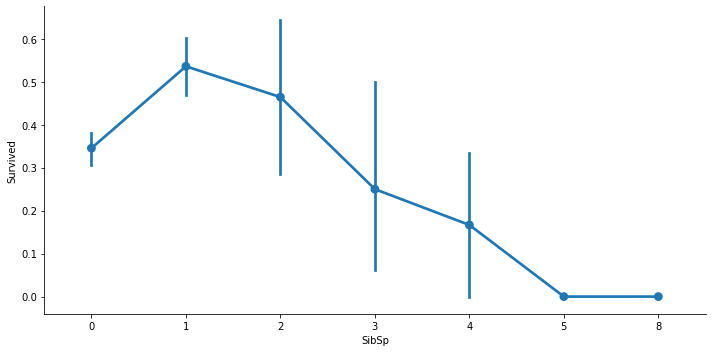

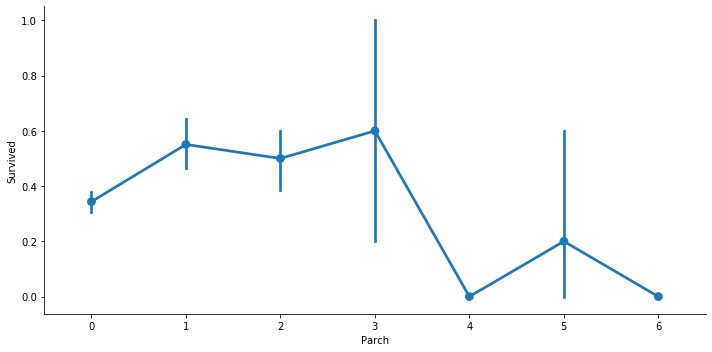

In [10]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=data, kind='point', aspect=2, ) # do a category plot

In [11]:
# SibSp and Parch follow the same trend and are reletd so let's combine them
data['Family_cnt'] = data['SibSp'] + data['Parch']

# drop unecessary varaibles
# drop passenger Id feature as well
data.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)
# inplace = True laters the data in place, without creating new data
data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


Clean categorical varaibles

In [12]:
data.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Family_cnt      0
dtype: int64

In [13]:
# create an indicator for cabin
# it will create two data frame: one where cabin is missing and one where it is not
data.groupby(data['Cabin'].isnull())['Survived'].mean()
# the survival rate is drastically lower when cabin is missing
# true is when cabin is missing and survival rate is 29%
# so people who did not have cabin were less likely to survived

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [14]:
# replace the missing value by the fact the poeple did not have a cabin
data['Cabin_ind']=np.where(data['Cabin'].isnull(), 0, 1)
data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


In [15]:
# Convert the male vs female by numeric values
gender_num = {'male':0, 'female':1}
data['Sex'] = data['Sex'].map(gender_num)
data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


In [19]:
# Drop unnecessary variables
data.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis =1, inplace=True)
# Why to drop Embarked?
data.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [ ]:
# Write out the cleaned data
#data.to_csv('titanic_cleaned.csv', index=False)

# Split into train, validation and test set

In [22]:
from sklearn.model_selection import train_test_split

features = data.drop('Survived', axis=1)
labels = data['Survived']

# test_train split can only slipt the data in two so we need to do it in 3 passes to get a avlidation set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [23]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [24]:
# Write out all data
#X_train.to_csv('train_feature.csv', index=False)
#X_val.to_csv('val_feature.csv', index=False)
#X_test.to_csv('test_feature.csv', index=False)

#y_train.to_csv('train_label.csv', index=False)
#y_val.to_csv('val_label.csv', index=False)
#y_test.to_csv('test_label.csv', index=False)

# Logistic Regression

In [25]:
# Regression is a statistical process for estiating the relationship among variables, 
# often to make a prediction about some outcome

# Logistic Regression is a form of regression where the target variable is binary (0 or 1, or True or False for example)
# this is different than linear regression

# Linear Regression  : y = mx + b
# Logistic Regression: y = 1 / (1 + exp(-(mx+b))) 

# When to use it? General guideline
# For binary target variable
# use if Transparency is important or interested in significance of predictors
# use with fairly well-behaved data
# need a quick initial benchmark model with fairly well-behaved data - quick to train

# When NOT to use it?
# for continuous target variable 
# Not for massive amount of data (rows or columns; fat vs skinny data)
# Not for unwieldly data with lots of outliners, misisng values, skwed features or complexe relationships
# if performance is the only thing that matters

In [26]:
from sklearn.linear_model import LogisticRegression

#To print all the hyperparameter that we can tune:
LogisticRegression()   

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# let's focus on the C parameter, which has a default value of 1.0
# See attribute and methods contained within that object
dir(LogisticRegression)
# see .fit and .predict 

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 'decision_function',
 'densify',
 'fit',
 'get_params',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params',
 'sparsify']

In [28]:
# The C hyperparameter is a regularization parameter in logistic regression that controls how closely the model fits to the training data
# Regularization is a technique used to reduce overfitting by discouraging overly complex models in some way

# C = 1 / lambda, lambda is actually the regularization parameter
# when lambda tends toward zero, C tends toward infinity
# Thus lambda = 0 means low regularization, high complexity and more likely to overfit!

# when lambda tends toward infinity, C tends towar zero
# this means high regularization, low complexity and more likely to underfit

K-fold cross validation

In [32]:
#K-fold cross-validation is to robustely train and test a model
from sklearn.model_selection import GridSearchCV
import warnings # for future versions of sklearn
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [33]:
# Hyperparameter tuning
# C = 1 / lambda

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std*2, 3), params))

In [37]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5) # 5 for five folds
cv.fit(X_train,y_train.values.ravel()) # fit on 4 of them and evaluate on the 4th

print_results(cv)

BEST PARAMS: {'C': 1}

0.67 (+/-0.077) for {'C': 0.001}
0.708 (+/-0.098) for {'C': 0.01}
0.777 (+/-0.134) for {'C': 0.1}
0.8 (+/-0.118) for {'C': 1}
0.794 (+/-0.116) for {'C': 10}
0.794 (+/-0.116) for {'C': 100}
0.794 (+/-0.116) for {'C': 1000}


C:\Users\emyro\.conda\envs\ScientificPython\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\emyro\.conda\envs\ScientificPython\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

In [38]:
# store the best fit model
cv.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# Write out pickled model
import joblib
joblib.dump(cv.best_estimator_, 'LR_model.pkl')

['LR_model.pkl']

# Support Vector Machines (SVM)

In [41]:
# A support Vector Machine (SVM) is a classifier that finds an optimal hyperplane that
# maximizes the margin between two classes
# Support vector is a perpendicular line between best fit line and the data points. 
# You want to maximize the length of those support vectors
# Hyperplane is like a line but for 3D and more

# So far, we require the data to be linearly separable, but for higher dimensions:
# the kernel trick (or kernel method) transforms data that is not linearly separable 
# in n-dimensional space to a higher dimension where it is linearly separable.


# When to use SVM?
# for classification problem, not regression
# For Binary target variable
# when the feature-to-row ratio is very high: lots of features and few rows
# for very complex relationship
# when there is lots of outliners

# When NOT to use it?
# when feature-to-row ratio is low: few features and lots of rows
# when transparency is important or interested in significance of predictors
# when you are looking for a quick benchmark model. It takes time to train

In [43]:
from sklearn.svm import SVC #support vector classifier

SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
# focus on the C hyperparameter and the kernel hyperparameter
dir(SVC) # for a look at all the methods

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_proba',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_estimator_type',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_more_tags',
 '_pairwise',
 '_predict_log_proba',
 '_predict_proba',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_sparse_predict_proba',
 '_validate_for_predict',
 '_validate_targets',
 '_warn_from_fit_status',
 'coef_',
 'decision_function',
 'fit',
 'get_params',
 'n_support_',
 'pr

In [46]:
# Hyperparameter tuning

# The C hyperparameter is a penalty term that determines how closely the model fits to the training set
# This is aregularization parameter
# A high value of C means low regularization (large penalty) and small margins
# A low value of C means small penalty for misclassification in training and large margins

# the kernel trick!

svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5) # 5 for five folds cross-validation
cv.fit(X_train,y_train.values.ravel()) # fit on 4 of them and evaluate on the 5th

print_results(cv)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.796 (+/-0.115) for {'C': 0.1, 'kernel': 'linear'}
0.654 (+/-0.06) for {'C': 0.1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 1, 'kernel': 'linear'}
0.661 (+/-0.048) for {'C': 1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 10, 'kernel': 'linear'}
0.684 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


In [47]:
cv.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
# Write out pickled model
joblib.dump(cv.best_estimator_, 'SVM_model.pkl')

['SVM_model.pkl']

# Multi-layer Perceptron

In [49]:
# A multi-layer perceptron is a classic feed-forward artificial neural network,
# the core component of deep learning.

# A multi-layer perceptron is a connected series of nodes (in the form of a directed acylic
# graph), where each node represents a function or a model.

# When to use it?
# for a categorical or continuous target variable
# for very complex relationships or performance is the only thing that matters
# when control over the training process is very important - lots of hyperparameters to control

# When NOT to use it?
# when need to do image recognition, time series, etc...
# if care about trasparency and is interested in significance of predictors. multi-layer predictors model are like black-boxes
# when need a quick benchmark model - lots of parameters to tweak
# when you have limited data available

In [52]:
# Hyperparameters to consider
from sklearn.neural_network import MLPRegressor, MLPClassifier

print(MLPRegressor())
print(MLPClassifier()) # same as for regressor!

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, ver

In [53]:
# activation
# the activation function hyperparameter dictates the type of nonlinearity 
# that is introduced to the model (Sigmoid = logistic curve, TanH = hyperbolic tangent curve,
# ReLU = rectified linear unit, etc...)

# hidden_layer_sizes
# Hidden_layer_sizes hyperparameter determines how many hidden layers there will be
# and how many nodes in each layer
# overfitting if too many nodes

# Learning rate
# The learning rate hyperparameter facilitates both how quickly and whether or not
# the algorithm will find the optimal solution

mlpC = MLPClassifier()
parameters = {
    'activation': ['relu', 'tanH', 'logistic'],
    'hidden_layer_sizes': [(10,),(50,),(100,)], # first number is number of node; leaving second numer blank implies that hidden layers = 1
    'learning_rate': ['constant','invscaling','adaptive']
}

cv = GridSearchCV(mlpC, parameters, cv=5) # 5 for five folds cross-validation
cv.fit(X_train,y_train.values.ravel()) # fit on 4 of them and evaluate on the 5th

print_results(cv)

C:\Users\emyro\.conda\envs\ScientificPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\emyro\.conda\envs\ScientificPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\emyro\.conda\envs\ScientificPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\emyro\.conda\envs\ScientificPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

C:\Users\emyro\.conda\envs\ScientificPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\emyro\.conda\envs\ScientificPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\emyro\.conda\envs\ScientificPython\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The activation 'tanH' is not supported. Supported activations are ['identity', 'logistic', 'relu', 'softmax', 'tanh'].

  FitFailedWarning)
C:\Users\emyro\.conda\envs\ScientificPython\lib\site-packages\skle

C:\Users\emyro\.conda\envs\ScientificPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\emyro\.conda\envs\ScientificPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\emyro\.conda\envs\ScientificPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\emyro\.conda\envs\ScientificPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

BEST PARAMS: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}

0.697 (+/-0.138) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.716 (+/-0.153) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.73 (+/-0.123) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.792 (+/-0.121) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.796 (+/-0.1) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.783 (+/-0.126) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.79 (+/-0.137) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.789 (+/-0.129) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.789 (+/-0.126) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learn

C:\Users\emyro\.conda\envs\ScientificPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [54]:
cv.best_estimator_

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [55]:
# Write out pickled model
joblib.dump(cv.best_estimator_, 'MLPClassifier_model.pkl')

['MLPClassifier_model.pkl']

# Random forest

In [56]:
# A random forest merges a collection of independent decision tress to get a more
# accurate and stable prediction.
# Ensemble methods combine several machine learning models in order to decrease
# both bias and variance.

# When to use it?
# for categorical and continuous target variable
# if interested in significance of predictors
# if need a quick benchmark model - quick to run
# If you have messy data, such as missing values, outliers

# When NOT to use it?
# if you are solving very complex, novel problem
# if transparency is important
# If prediction time is important
# does not always give the best performance, but good swiss army knife

In [58]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

print(RandomForestClassifier())
print(RandomForestRegressor())

#Hyperparamters to consider
#n_estimators
# The n_estimators hyperparameter controls how many individual decision trees will be built.

#max_depth
# The max-depth hyperparameter controls how deep each individual decision tree can go.

rfC = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None] # None let the tree goes deep as it can
}

cv = GridSearchCV(rfC, parameters, cv=5) # 5 for five folds cross-validation
cv.fit(X_train,y_train.values.ravel()) # fit on 4 of them and evaluate on the 5th

print_results(cv)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      rand

In [59]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
# Write out pickled model
joblib.dump(cv.best_estimator_, 'RFClassifier_model.pkl')

['RFClassifier_model.pkl']

# Boosting

In [61]:
# Boosting is an ensemble method that aggregates a number of waek models to create
# one strong model
# A weak model is one that is only slightly better than random guessing.
# A strong model is one that is strongly correlated with the true classification.
# Boosting effectively learns from its mistakes with each iteration.
# Trainging process is not independent like it is in random forest
# This is one of the most used algorithm and one of the most flexible!

# We will try gradient boosted try, a specific variant of boosting

# When to use boosting?
# for classification and regression, so for categorical and continuous target variable
# useful on nearly any type of problem
# if interested in significance of predictors
# if prediction time is important - it is fast at prediction time

# When NOT to use boosting?
# when transparency is important because individual trees are so many that it is complicated to understand all of them
# if training time is imprtant or computer power is limited - it is slow to train
# if data is really noisy - it has a tendency to overfit or fit the outliers

In [66]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

print(GradientBoostingClassifier())
print(GradientBoostingRegressor())

#Hyperparamters to consider
#n_estimators
# The n_estimators hyperparameter controls how many individual decision trees will be built.
# need to train more shallow trees than in random forest

#max_depth
# The max-depth hyperparameter controls how deep each individual decision tree can go.
# The trees must be shallower than for random forest

#learning_rate
# seen in perceptron. In Gradient Boosting, it controls the actual value of learning rate 
# and stays constant across the optimization process

gbC = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gbC, parameters, cv=5) # 5 for five folds cross-validation
cv.fit(X_train,y_train.values.ravel()) # fit on 4 of them and evaluate on the 5th

print_results(cv)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
 

In [67]:
cv.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [68]:
# Write out pickled model
joblib.dump(cv.best_estimator_, 'GBClassifier_model.pkl')

['GBClassifier_model.pkl']

# Summary 

In [69]:
# Which algorithm generates the best model for this given problem?

# Latency
# How long will it take to train?
# How long will it take to predict?

# Accuracy
# How do they handle data of different size, such as short and fat, long and skinny?
# How will they handle the complexity of feature relationships?
# How will they handle messy data?

# usually start with 6 or 7 models and narrow it down to 3 or 4, etc...

#Summary table

#          Problem type  Train speed   Predict speed    Interpretability   performance  performance with limited data

#logistic  Classification  fast           fast             medium           lower     higher
#regression

#Support   
#vector   Classification   slowest       moderate          low              medium    higher
#machine

#multilayer    Both        slow          moderate          low              high      lower
#perception

#random        Both        moderate     moderate           low               medium   lower
#forest

#boosted       Both        slow          fast               low             high      lower
#trees     

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

models = {}

for mdl in ['LR','SVM','MLPClassifier','RFClassifier','GBClassifier']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [72]:
models

{'LR': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'SVM': SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'MLPClassifier': MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
               beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=(100,), learning_rate='constant',
               learning_rate_init=0.001, max_fun=15000, max_iter=200,
               momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
               power

In [75]:
# Evaluation metrics

# accuracy = #predicted correctly / total # of examples

# precision = #predicted as surviving that actually survived / total # of examples

# recall = #predicted as surviving that actually survived / total # that actually survived

def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                  accuracy,
                                                                                  precision,
                                                                                  recall,
                                                                                  round((end-start))))

In [79]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_val, y_val)

LR -- Accuracy: 0.775 / Precision: 0.712 / Recall: 0.646 / Latency: 0ms
SVM -- Accuracy: 0.747 / Precision: 0.672 / Recall: 0.6 / Latency: 0ms
MLPClassifier -- Accuracy: 0.781 / Precision: 0.724 / Recall: 0.646 / Latency: 0ms
RFClassifier -- Accuracy: 0.803 / Precision: 0.788 / Recall: 0.631 / Latency: 0ms
GBClassifier -- Accuracy: 0.815 / Precision: 0.808 / Recall: 0.646 / Latency: 0ms


In [80]:
# Evaluate best model on test set
evaluate_model('Gradient Boosting', models['GBClassifier'], X_test, y_test)

Gradient Boosting -- Accuracy: 0.816 / Precision: 0.852 / Recall: 0.684 / Latency: 0ms
